## 1. 데이터 전처리 및 데이터 파악

- scikit-learn 패키지에 데이터와 PCA 로드.

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

- 자료 처리에 도움을 줄 pandas, numpy와 시각화를 위한 pyplot, seaborn 로드

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# iris 데이터 불러오기

iris = datasets.load_iris()
dir(iris) # 구조확인

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
## 설명의 편의를 위해, 독립변수 중 처음 2개만을 사용

X = iris.data[:,[0,2]]
y = iris.target

In [8]:
print(X.shape)
feature_names = [iris.feature_names[0],iris.feature_names[2]]
print(feature_names)
df_X = pd.DataFrame(X)
df_X.head()

(150, 2)
['sepal length (cm)', 'petal length (cm)']


,0,1
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [9]:
print(y.shape)
df_Y = pd.DataFrame(y)
df_Y.head()

(150,)


,0
0,0
1,0
2,0
3,0
4,0


- 결측치 여부 파악

In [10]:
print(df_X.isnull().sum())
print(df_Y.isnull().sum())

0    0
1    0
dtype: int64
0    0
dtype: int64


In [11]:
print(set(y))
iris.target_names  # 식물의 종류

{0, 1, 2}


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 종속 변수(출력변수, 반응변수)의 분포를 살핌

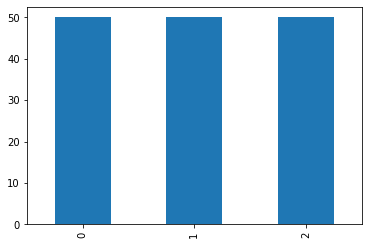

In [12]:
df_Y[0].value_counts().plot(kind='bar')
plt.show()

- 독립 변수(속성, 입력변수, 설명변수)의 분포를 살핌.

C:\Users\MiHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


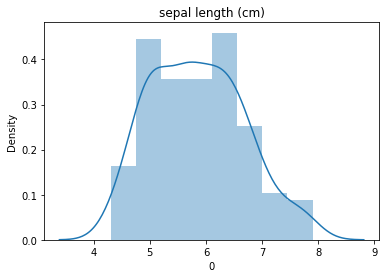

C:\Users\MiHee\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


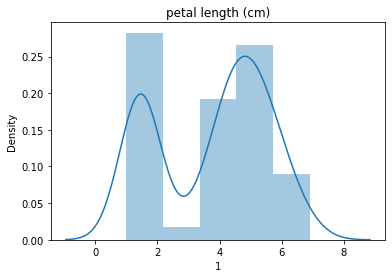

In [13]:
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

# 2.PCA 함수 활용 및 아웃풋 의미파악



- PCA 함수를 활용하여 PC를 얻어냄. 아래의 경우 PC 2개를 뽑아냄.

In [14]:
pca=PCA(n_components=2) # PCA 객체를 만듬
pca.fit(X)

PCA(n_components=2)

- 아래와 같이 PC score를 얻어냄. 아래의 PC score를 이용하여, 회귀분석에 활용할 수 있음

In [15]:
print(pca.components_) # eigen vectors
print(pca.explained_variance_) # eigen values

PCscore=pca.transform(X)
PCscore[0:5]

[[ 0.39360585  0.9192793 ]
 [-0.9192793   0.39360585]]
[3.66189877 0.1400726 ]


array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [16]:
eigens_v=pca.components_.transpose() # 행이 각각의변수, 열이 eigen vector로 transpose
print(eigens_v)

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [17]:
# centering
mX = np.matrix(X)
for i in range(X.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(X[:,i])
dfmX=pd.DataFrame(mX)

In [18]:
(mX*eigens_v)[0:5]  # 정사형을 시켜서 transpose

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

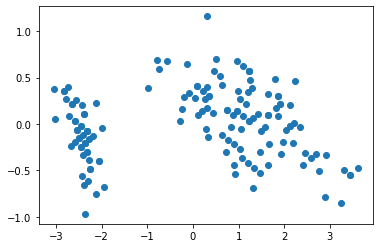

In [19]:
plt.scatter(PCscore[:,0], PCscore[:,1])  # 점들을 축으로 정사형 시킨것.
plt.show()

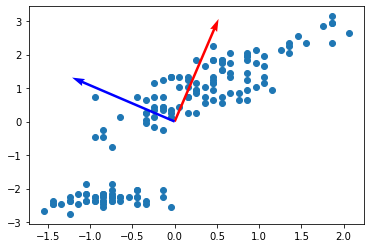

In [20]:
plt.scatter(dfmX[0], dfmX[1])
origin = [0], [0]  # origin point
plt.quiver([0,0],[0,0], eigens_v[0,:], eigens_v[1,:], color=['r','b'], scale=3)
plt.show()

## 3. PC를 활용한 회귀분석


- 모든 독립변수를 활용하여 PC를 뽑아냄.

In [21]:
X2 = iris.data
pca2 = PCA(n_components=4)
pca2.fit(X2)

PCA(n_components=4)

In [22]:
pca2.explained_variance_   # eigen values

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [25]:
PCs=pca2.transform(X2)[:,0:2]     # eigen value 2개 선택

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

- 모델의 복잡성으로 인하여 기존 자료를 이용한 분석은 수렴하지 않는 모습.

In [27]:
cif = LogisticRegression(solver='sag',multi_class='multinomial').fit(X2, y)

C:\Users\MiHee\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


- PC 2개 만을 뽑아내어 분석한 경우 모델이 수렴

In [28]:
cif2 = LogisticRegression(solver='sag',multi_class='multinomial').fit(PCs, y)

In [30]:
confusion_matrix(y,cif2.predict(PCs))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

- 임의로 변수 2개 만을 뽑아내어 분석한 경우 모델의 퍼포먼스가 하락함.

In [31]:
cif = LogisticRegression(solver='sag', max_iter=1000, random_state=0,multi_class='multinomial').fit(X2[:,0:2], y)

In [32]:
confusion_matrix(y, cif.predict(X2[:,0:2]))

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

- 위와 같이 차원축소를 통하여 모델의 복잡성을 줄이는 동시에 최대한 많은 정보를 활용하여 분석할 수 있음.